## Homework 01: First Steps with Linear Regression

This homework will introduce you to foundational techniques in downloading and setting up datasets, running `sklearn` models, and examining their results. The primary goal is to establish the workflow for accessing and submitting assignments, writing basic code, and interpreting outputs. This assignment will also help us test the autograder and ensure that feedback mechanisms work seamlessly.

### Submission Instructions via Gradescope

We will use Gradescope for homework submissions this term. Please follow these instructions carefully:

1. **Absolutely do not do either of these**, which will cause the autograder to fail, resulting in a 0 for the assignment or that problem:

   - **Do not rename the file**: It must be submitted as  **`Homework_01.ipynb`**. 

   - **Do not make any changes to the cells containing the grading code**, e.g.,
```python
            # Graded Answer
            # DO NOT change this cell in any way          

            print(f'a1 = ${a1:,}')
```


2. **Verify before submission**  
   - Before submitting, run `Restart Kernel and Run All` to ensure that all cells execute without errors. We do **not** run your notebook before grading it. 

3. **Submitting to Gradescope**  
   - You should have received an email inviting you to join Gradescope. If not, please contact us immediately.  
   - Log in to [Gradescope](https://gradescope.com), navigate to your dashboard, and locate **Homework 01**.  
   - Drag and drop the following file into the upload section:
     - **`Homework_01.ipynb`**
   - Click `Upload` to submit your file.


4. **Review your submission**  
   - You will receive a confirmation email after submission.
   - You will receive the autograder results on Saturday morning after the last late deadline has passed; we will also inform you of the expected results.  
   - For the first two homeworks, **multiple resubmissions** will be allowed and **no late penalty** will be applied. Use this opportunity to get your debugging and submission workflow established.   
   - Starting from Homework 03, **only one submission will be permitted** and the **late penalty** (10% per date late up to 5 days) will be applied. You will need to ensure that your work is complete and carefully verified before uploading.
  
5. **Review your grade**
  - We will inform you of the expected results after grading. We do not distribute full solutions.
  - If you believe there is a problem with your grades, you may submit a **regrade request** on Gradescope. Please be specific. Requests such as "Please regrade the entire assignment" will result in our repeating the previous sentence. Regrade requests must be made within two weeks of receiving your grade. 

In [24]:
# Useful imports and utilities

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as mtick

## Problem:  Linear Regression on the Kaggle Salary Dataset

This is a great dataset to start with: it is a univariate regression dataset predicting salary from years of experience. It is probably the smallest dataset on Kaggle!

### (A) Install `kagglehub` if you don't already have it

The first thing to do is to install `kagglehub` if you don't have it already. If you *do*, make sure you have the most recent version.

In [ ]:
# # Since you only need to do this once, uncomment the following line, run the cell, and then recomment or delete this cell.
# # Or do this the usual way you do installs (e.g., in Terminal on a Mac). 

# !pip install kagglehub


'pip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import kagglehub
print("Kagglehub version:", kagglehub.__version__)
  

Kagglehub version: 0.4.0


c:\Users\alh55\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# If you need to upgrade, uncomment and run this cell, then delete or recomment.
# But do not worry excessively about upgrading to the most recent version at this point, 
# even if you get "Warning: Looks like you're using an outdated...." when you download the dataset.

# !pip install --upgrade kagglehub


### (B) Download the dataset and prepare it for modeling.

Continue running cells as shown, following the instructions in text cells and comments in code cells (usually "Your code here"), and then answer the questions below.

#### B.1 

Download the dataset

In [ ]:
# Download latest version, which will be installed on your local machine
# After running this cell once, you could comment this out.  

# salary_dataset_path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

# print("Path to dataset files:", salary_dataset_path)

100%|██████████| 457/457 [00:00<00:00, 368kB/s]

Extracting files...
Path to dataset files: C:\Users\alh55\.cache\kagglehub\datasets\abhishek14398\salary-dataset-simple-linear-regression\versions\1


In [10]:
# Assuming the dataset is named "Salary_dataset.csv" inside the path
salary_dataset_path_to_file = os.path.join(salary_dataset_path, "Salary_dataset.csv")
salary_data_raw = pd.read_csv(salary_dataset_path_to_file)

#### B.2  

Print out the head and info about the dataset

In [25]:
print(salary_data_raw.head())


   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [26]:
print(salary_data_raw.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None


#### B.3  

Using Pandas `hist()`, display histograms of the columns.  Set the `bins` parameter to make the visualization as useful as possible (YMMV, so don't stress about it).

**Pro tip**: Put `plt.show()` in the last line of the cell to keep from printing out
the (ugly) return value `array([[<Axes: title={'...` 

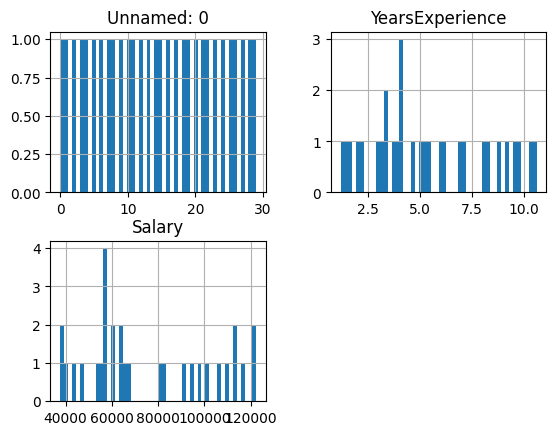

In [17]:
salary_data_raw.hist(bins=50)
plt.show()


#### B.4  

Print out some **simple stats about the data**.

#### TODO:

Set the variable `a1` to an expression which returns the maximum salary in the dataset.

In [22]:
## Your answer here, NOT in the next cell

a1 = salary_data_raw['Salary'].max()    # Replace 0 with an expression returning an integer

In [23]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a1 = ${a1:,}')                      # This will print out in proper currency format

a1 = $122,392.0


#### TODO:

Set the variable `a2` to an expression which returns the average number of years  of experience in the dataset. 

In [27]:
## Your answer here, NOT in the next cell

a2 = salary_data_raw['YearsExperience'].mean()    # Replace 0.0 with an expression returning a float

In [29]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a2 = {a2:.2f}')               # This will print to 2 decimal places

a2 = 5.41


### (C) Clean the data

There seems to be a problem, namely an extra column that is completely unnecesssary! 

1. Delete that column using appropriate Pandas code and assign the result to a new variable `salary_data`;
2. Check to see all is well, by setting the variable `feature_names` to a **Python list** of the feature names in the new dataframe and then printing it (you might want to do this before and after, just to get the precise name of the column to remove). (Hint: if your value is in the form `Index(...)` then it is not a Python list.)

In [32]:
salary_data = salary_data_raw.drop('Unnamed: 0',axis=1)


feature_names = salary_data.columns.to_list()                
print(f'Features: {feature_names}')

Features: ['YearsExperience', 'Salary']


#### TODO:

Set the variable `a3` to the shape of the dataset, a pair in the form (n_rows,n_cols). 

In [33]:
# TODO: Your answer here 

a3 = salary_data.shape          # Replace 0,0 with an expression calculating this pair

In [34]:
# Graded Answer
# DO NOT change this cell in any way  

print(f'a3 = {a3}')              

a3 = (30, 2)


### (D) Convert the dataframe to (X,y) form for processing. 

Create a numpy array `X` from the first column and array `y` from the second column. Create `X` by deleting the second column from a copy of the dataframe, **not** by just selecting the first column (which won't work when there is more than one feature). For `y` you can just select the second column. 

#### TODO

Confirm by setting the variable `a4` to the shape of `X`.  (You should probably also check the shape of `y`.)

In [35]:
# Your code here

a4 = 0,0                  # replace 0,0 with an expression returning the shape of X
         

In [36]:
# Graded Answer
# DO NOT change this cell in any way  

print(f'a4 = {a4}')    

a4 = (0, 0)


### (E) Display the data as a scatterplot

Display a scatterplot of the data using appropriate title, legend, and axis labels.  YMMV, but make it attractive!

**Pro tip**:  To render the Y-axis labels as dollars, use the following line (we imported `mtick` above):

```python
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  # e.g., $40,000
```

In [37]:
# Your code here (not graded)



 ### (F) Linear Regression in Sklearn
 
Now we will run linear regression on the dataset, plot the regression line, and print out the intercept and slope of the
least-squares line with some evaluation metrics.

#### TODO

Train your model on the whole dataset, and set `a5` to the intercept (a float)  (note: `sklearn` stores the intercept/bias separately from the coefficients)

In [39]:
# Your code here



a5 = 0.0          # replace 0.0 with an expression returning the intercept value   

In [40]:
# Graded Answer
# DO NOT change this cell in any way  

print(f'a5 = ${a5:,.2f}')              # will print in dollars

a5 = $0.00


#### TODO

Set `a6` to the slope (a float).

In [41]:
# Your code here

a6 = 0.0  # replace 0.0 with an expression returning the slope value   

In [42]:
# Graded Answer
# DO NOT change this cell in any way  

print(f'a6 = ${a6:,.2f}')              # will print in currency format, since it is dollars per years of experience!

a6 = $0.00


#### Redo the plot!

Now you must rewrite your code for the scatterplot to overlay the **regression line in red**. The easiest way to do this
is to  use `model.predict(X)` to get the predicted values, and then use `plt.plot()` to overlay the line.

In [55]:
# Your code here (not graded)



#### TODO

Set `a7` to the mean square error (a float) of the model on the whole dataset.
Hint: get MSE from `y` and `y_pred`, which you just calculated. 
Another Hint: Look at the import cell!

In [44]:
# Your code here
a7 = 0.0        # replace 0.0 with an expression returning the MSE   

In [45]:
# Graded Answer
# DO NOT change this cell in any way  

print(f'a7 = {a7:.4f}')              # will print with 4 decimal places, note that the units are dollars squared!

a7 = 0.0000


#### TODO

Set `a8` to the **root** mean square error (a float) of the model on the whole dataset.

In [46]:
# Your code here
a8 = 0.0         # replace 0.0 with an expression returning the RMSE   

In [47]:
# Graded Answer
# DO NOT change this cell in any way  

print(f'a8 = ${a8:,.2f}')              # will print in dollars

a8 = $0.00


#### TODO

Set `a9` to the mean absolute error (a float) of the model on the whole dataset.

In [48]:
# Your code here
a9 = 0.0             # replace 0.0 with an expression returning the MAE

In [49]:
# Graded Answer
# DO NOT change this cell in any way  

print(f'a9 = ${a9:,.2f}')              # will print in dollars

a9 = $0.00


#### TODO

Set `a10` to the $R^2$ score (a float) for the model on the whole dataset. 

In [50]:
# Your code here
a10 = 0.0           # replace 0.0 with an expression returning the r2 value

In [51]:
# Graded Answer
# DO NOT change this cell in any way  

print(f'a10 = {a10:.4f}')              # will print with 4 decimal places - note that this is a percentage, but we usually just give a float

a10 = 0.0000
